<a href="https://colab.research.google.com/github/elitesf/Basic-Graph-Visualizer/blob/master/Building_Vocabulary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packets of thought**
**(NLP overview)**

## **Natural language vs. programming language**

Natural languages are different from computer programming languages. They aren’t
intended to be translated into a finite set of mathematical operations, like programming languages are. Natural languages are what humans use to share information
with each other. We don’t use programming languages to tell each other about our
day or to give directions to the grocery store. A computer program written with a programming language tells a machine exactly what to do. But there are no compilers or
interpreters for natural languages such as English and French

> **DEFINITION**: Natural language processing is an area of research in computer science and artificial intelligence (AI) concerned with processing natural languages such as English or Mandarin. This processing generally involves translating natural language into data (numbers) that a computer can use to learn about the world. And this understanding of the world is sometimes used to generate natural language text that reflects that understanding.

Nonetheless, we are trying to build a machine that can process natural language or a natural language interpreter

> **DEFINITION** A natural language processing system is often referred to as a pipeline because it usually involves several stages of processing where natural language flows in one end and the processed output flows out the other.

## **Practical applications**

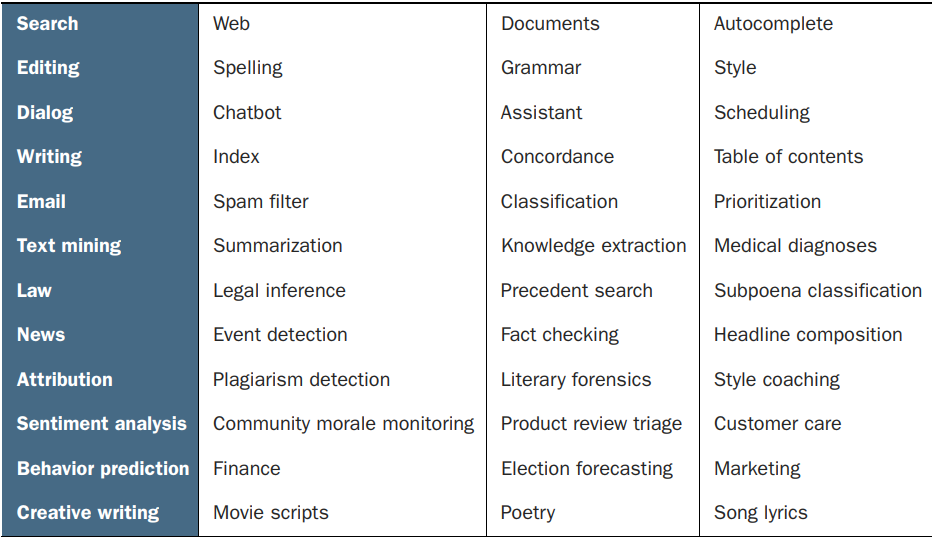

## **Language through a computer’s “eyes”**

When you type “Hello, How are you?” a computer sees only “01000111 0110111101101111 …”. How can you program a chatbot to respond to this binary stream intelligently? 

Could a nested tree of conditionals (if… else… statements) check each one of those bits and act on them individually? This would be  equivalent to writing a special kind of program called a finite state machine (FSM). 

An FSM that outputs a sequence of new symbols as it runs, like the Python `str.translate` function, is called a finite state transducer (FST). 

You’ve probably already built an FSM without even knowing it. Have you ever written a regular expression? That’s the kind of FSM we use in the next section to show you one possible approach to NLP: ***the pattern-based approach***.

What if you decided to search a memory bank (database) for the exact same string of bits, characters, or words, and use one of the responses that other humans and authors have used for that statement in the past? 

But imagine if there was a typo or variation in the statement. A chat bot would be sent off the rails. And bits aren’t continuous or forgiving—they either match or they don’t. 

There’s no obvious way to find similarity between two streams of bits that takes into account what they signify. The bits for “good” will be just as similar to “bad!” as they are to “okay.” 



# **A simple chatbot**

Let’s build a quick and dirty chatbot.

This pattern matching chatbot is an example of a tightly controlled chatbot. Pattern matching chatbots were common before modern machine learning chatbot techniques were developed. 

For now let’s build an FSM, a regular expression, that can speak regular language. An important feature for a prosocial chatbot is to be able to respond to a greeting.

In machine communication protocol, we’d define a simple handshake with an ACK (acknowledgement) signal after each message passed back and forth between two machines. But our machines are going to be interacting with humans who say things like “Good morning.” 

Let’s use regular expressions to recognize several different human greetings at the start of a conversation handshake.





In [ ]:
import re
# There are two “official” regular expression packages in Python. 
# We use the re package here just because it’s installed with all versions 
# of Python. The regex package comes with later versions of Python and is 
# much more powerful.

r = "(hi|hello|hey)[ ]*([a-z]*)"
# '|' means “OR,” and '\*' means the preceding character can occur 0 or more
# times and still match. So our regex will match greetings that start with “hi” 
# or “hello” or “hey” followed by any number of '<space>' characters and
# then any number of letters.

re.match(r, 'Hello Rosa', flags=re.IGNORECASE)
# Ignoring the case of text characters is common, to keep the regular
# expressions simpler.

<re.Match object; span=(0, 10), match='Hello Rosa'>

In [ ]:
re.match(r, "hi ho, hi ho, it's off to work ...", flags=re.IGNORECASE)

<re.Match object; span=(0, 5), match='hi ho'>

In [ ]:
re.match(r, "hey, what's up", flags=re.IGNORECASE)

<re.Match object; span=(0, 3), match='hey'>

In regular expressions, you can specify a character class with square brackets. 

You can use a dash (-) to indicate a range of characters without having to type them all out individually. 

* So the regular expression "[a-z]" will match any single lowercase letter, “a” through “z.” 
* The star ('*') after a character class means that the regular expression will match any number of consecutive characters if they are all within that character class.

Let’s make our regular expression a lot more detailed to try to match more greetings:

In [ ]:
r = r"[^a-z]*([y]o|[h']?ello|ok|hey|(good[ ])?(morn[gin']{0,3}|"r"afternoon|even[gin']{0,3}))[\s,;:]{1,3}([a-z]{1,20})"
re_greeting = re.compile(r, flags=re.IGNORECASE)
# You can compile regular expressions so you don’t have to specify the options
# (flags) each time you use them.

In [ ]:
re_greeting.match('Hello Rosa')

<re.Match object; span=(0, 10), match='Hello Rosa'>

In [ ]:
re_greeting.match('Hello Rosa').groups()

('Hello', None, None, 'Rosa')

In [ ]:
re_greeting.match("Good morning Rosa")

<re.Match object; span=(0, 17), match='Good morning Rosa'>

In [ ]:
re_greeting.match("Good Manning Rosa")
# Notice that this regular expression cannot recognize (match) words with typos.

In [ ]:
re_greeting.match('Good evening Rosa Parks').groups()
# Our chatbot can separate different parts of the greeting into groups,
# but it will be unaware of Rosa’s famous last name, because we
# don’t have a pattern to match any characters after the first name.

('Good evening', 'Good ', 'evening', 'Rosa')

In [ ]:
re_greeting.match("Good Morn'n Rosa")

<re.Match object; span=(0, 16), match="Good Morn'n Rosa">

In [ ]:
re_greeting.match("yo Rosa")

<re.Match object; span=(0, 7), match='yo Rosa'>

The "r" before the quote specifies a raw string, not a regular expression.

With a Python raw string, you can send backslashes directly to the regular expression compiler without having to double-backslash ("\\") all the special regular expression characters such as spaces ("\\ ") and curly braces or handlebars ("\\{ \\}")

There’s a lot of logic packed into that first line of code, the regular expression. 

It gets the job done for a surprising range of greetings. But it missed that “Manning” typo, which is one of the reasons NLP is hard. 

In machine learning and medical diagnostic testing, that’s called a false negative classification error. 

Unfortunately, it will also match some statements that humans would be unlikely to ever say—a false positive, which is also a bad thing. 

Having both false positive and false negative errors means that our regular expression is both too liberal and too strict. 

And this tedious work would be highly unlikely to ever succeed at capturing all the slang and misspellings people use. 

Fortunately, composing regular expressions by hand isn’t the only way to train a chatbot. So we only use them when we need precise control over a chatbot’s behavior, such as when issuing commands to a voice assistant on our mobile phone.

But let’s go ahead and finish up our one-trick chatbot by adding an output generator. It needs to say something. We use Python’s string formatter to create a “template” for our chatbot response:

In [ ]:
my_names = set(['rosa', 'rose', 'chatty', 'chatbot', 'bot','chatterbot'])
curt_names = set(['hal', 'you', 'u'])
greeter_name = 'Muneendra'
match = re_greeting.match(input())
if match:
  at_name = match.groups()[-1]
  if at_name in curt_names:
    print("Good one.")
  elif at_name.lower() in my_names:
    print("Hi {}, How are you?".format(greeter_name))

Hello hal
Good one.


So if you run this little script and chat to our bot with a phrase like “Hello Rosa,” it will respond by asking about our day. 

If you use a slightly rude name to address the chatbot, she will be less responsive, but not inflammatory, to try to encourage politeness.

If you name someone else who might be monitoring the conversation on a party line or forum, the bot will keep quiet and allow you and whomever you are addressing to chat. 

Obviously there’s no one else out there watching our input() line, but if this were a function within a larger chatbot, you’d want to deal with these sorts of things.

Because of the limitations of computational resources, early NLP researchers had to use their human brains’ computational power to design and hand-tune complex logical rules to extract information from a natural language string. 

This is called a pattern based approach to NLP. 

The patterns don’t have to be merely character sequence patterns, like our regular expression. NLP also often involves patterns of word sequences, or parts of speech, or other “higher level” patterns. 

The core NLP building blocks like stemmers and tokenizers as well as sophisticated end-to-end NLP dialog engines (chatbots) like ELIZA were built this way, from regular expressions and pattern matching.


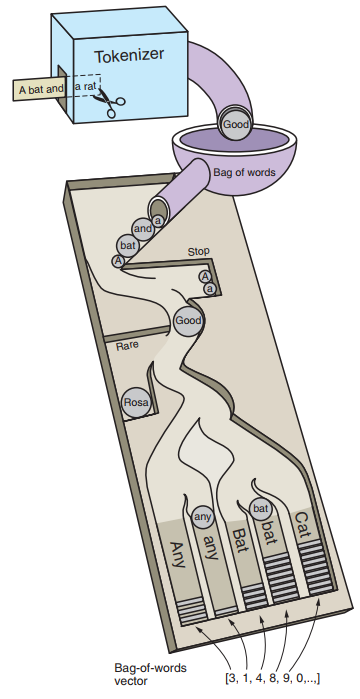

Imagine a token sorter into an NLP pipeline. 

We’ve included a stopword filter as well as a “rare” word filter in our
mechanical token sorter sketch. 

Strings flow in from the top, and bag-of-word vectors are created from the height profile of the token “stacks” at the bottom.

Each document, after token sorting and counting, can be represented as a vector, a sequence of integers for each word or token in that document.

This is our first vector space model of a language. Those bins and the numbers they contain for each word are represented as long vectors containing a lot of
zeros and a few ones or twos scattered around wherever the word for that bin occurred. 

All the different ways that words could be combined to create these vectors
is called a vector space. 

And relationships between vectors in this space are what make up our model, which is attempting to predict combinations of these words occurring within a collection of various sequences of words (typically sentences or documents). 

## **A chatbot natural language pipeline**

A chatbot requires four kinds of processing as well as a database to maintain a memory of past statements and responses. Each of the four processing stages can contain one or more processing algorithms working in parallel or in series:

1. **Parse**— Extract features, structured numerical data, from natural language text.

2. **Analyze** — Generate and combine features by scoring text for sentiment, grammaticality, and semantics.
3. **Generate** — Compose possible responses using templates, search, or language models.
4. **Execute** — Plan statements based on conversation history and objectives, and select the next response.

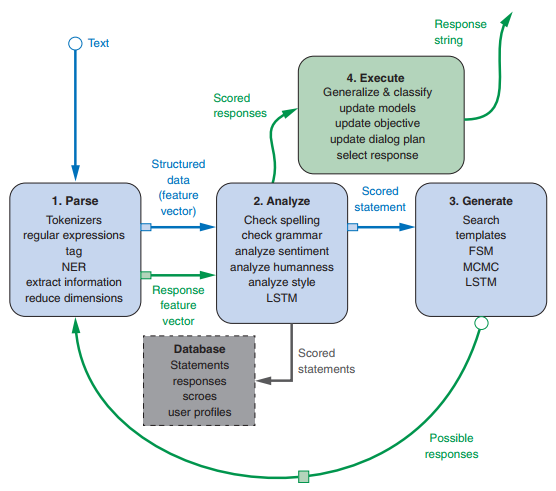

# **Natural language IQ**

Like human brainpower, the power of an NLP pipeline cannot be easily gauged with a single IQ score without considering multiple “smarts” dimensions.

For a natural language processing pipeline, the goal is to build systems that fully automate the processing of natural language, eliminating all human supervision (once the model is trained and deployed). So a better pair of IQ dimensions should capture the breadth and depth of the complexity of the natural language pipeline.

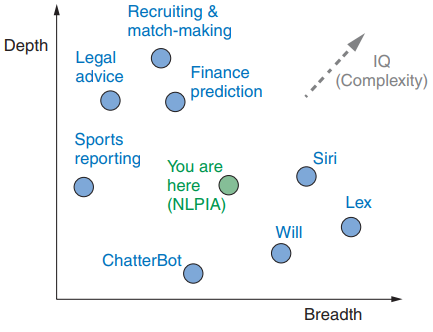

As you progress through, we’ll be building the elements of a chatbot. Chatbots require all the tools of NLP to work well:
* Feature extraction (usually to produce a vector space model)
* Information extraction to be able to answer factual questions
* Semantic search to learn from previously recorded natural language text or
dialog
* Natural language generation to compose new, meaningful statements

# **Build your vocabulary**

Retrieving tokens from a document will require some string manipulation beyond just the `str.split()` method.

Think for a moment about what a word or token represents to you and how to divide up text into words.


## **Word tokenization**

In NLP, tokenization is a particular kind of document segmentation. 

Segmentation breaks up text into smaller chunks or segments, with more focused information content.

Segmentation can include breaking a document into paragraphs, paragraphs into sentences, sentences into phrases, or phrases into tokens (usually words) and punctuation. 

Here we focus on segmenting text into tokens, which is called **tokenization**

Fundamental building blocks of NLP and their equivalents in a computer language compiler:
* tokenizer — scanner, lexer, lexical analyzer
* vocabulary — lexicon
* parser — compiler
* token, term, word, or n-gram — token, symbol, or terminal symbol

The simplest way to tokenize a sentence is to use whitespace within a string as the “delimiter” of words. 

In Python, this can be accomplished with the standard library method `split`, which is available on all `str` object instances as well as on the `str`
built-in class itself. 

In [ ]:
sentence = "Thomas Jefferson began building Monticello at the age of 26."
sentence.split()

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26.']

**Note:** A good tokenizer should strip off the extra character to create the word “26” as an equivalent class for the words “26,” “26!”, “26?”, and “26.” 

A more accurate tokenizer would also output a separate token for any sentence-ending punctuation so that a sentence segmenter or sentence boundary detector can find the end of that sentence.

## **One-hot vectors**

**A vocabulary lists all the unique tokens (words) that are present in the text.**

We can create a numerical vector representation for each word. 

These vectors are called one-hot vectors. 

A sequence of these one-hot vectors fully captures the original document text in a sequence of vectors, a table of numbers. 

That will solve the first problem of NLP, turning words into numbers:

In [ ]:
import numpy as np

# str.split() is our quick-and-dirty tokenizer
token_sequence = str.split(sentence)

# Sorted lexographically (lexically) so numbers come before letters, and capital letters come before lowercase letters.
vocab = sorted(set(token_sequence)) 

', '.join(vocab)

'26., Jefferson, Monticello, Thomas, age, at, began, building, of, the'

In [ ]:
num_tokens = len(token_sequence)
vocab_size = len(vocab)

# The empty table is as wide as our count of unique vocabulary terms and as high as the length of our document, 10 rows by 10 columns.
onehot_vectors = np.zeros((num_tokens, vocab_size), int)

# For each word in the sentence, mark the column for that word in our vocabulary with a 1.
for i, word in enumerate(token_sequence):
  onehot_vectors[i, vocab.index(word)] = 1

' '.join(vocab)

'26. Jefferson Monticello Thomas age at began building of the'

In [ ]:
onehot_vectors

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

A DataFrame keeps track of labels for each column, allowing us to label each column in our table with the token or word it represents. 

In [ ]:
import pandas as pd
pd.DataFrame(onehot_vectors, columns=vocab)

,26.,Jefferson,Monticello,Thomas,age,at,began,building,of,the
0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,0,0,0


One nice feature of this vector representation of words and tabular representation of documents is that no information is lost. As long as you keep track of which words are indicated by which column, you can reconstruct the original document from this table of one-hot vectors. 

They’re a good choice for any model or NLP pipeline that needs to retain all the
meaning inherent in the original text.

In most cases, the vocabulary of tokens you’ll use in an NLP pipeline will be millions of tokens. 

Let’s assume you have a million tokens in our NLP pipeline vocabulary. And let’s say you have a meager 3,000 books with 3,500 sentences each and 15 words per sentence:

In [ ]:
# Number of rows in the table
num_rows = 3000 * 3500 * 15
num_rows

157500000

In [ ]:
# Number of bytes, if you use only one byte for each cell in our table
num_bytes = num_rows * 1000000
num_bytes

157500000000000

In [ ]:
num_bytes/1e9 # Gigabytes

157500.0

In [ ]:
# In a python interactive console, the variable name "_" is
# automatically assigned the value of the previous output. This is handy
# if you forget to explicitly assign the output of a function or expression
# to a variable name like you did for num_bytes and num_rows.

_ / 1000  # Terabytes


157.5

## **Bag-of-words**

Storing all those zeros, and trying to remember the order of the words in all our documents, doesn’t make much sense. 

What we want to do is compress the meaning of a document down to its essence. 

We’d like to compress the document down to a single vector rather than a big table. 

Let’s assume you can ignore the order and grammar of the words, and jumble them all up together into a “bag,” one bag for each sentence or short document.

A **bag-of-words** vector is useful for summarizing the essence of a document. Even after we sorted all the words lexically, a human can still guess what the sentence was about and so can a machine. You can use this new bag-of-words vector approach to compress the information content for each document into a data structure that’s easier to work with.

If we summed all the one-hot vectors together we’d get a **bag-of-words** vector. 

This is also called a **word frequency vector**, because it only counts the frequency of words, not their order. 

You could use this single vector to represent the whole document or sentence in a single, reasonable length vector. It would only be as long as our vocabulary size (the number of unique tokens you want to keep track of).


We can also put the tokens into a binary vector indicating the presence or absence of a particular word in a particular sentence. 

This vector representation of a set of sentences could be “indexed” to indicate which words were used in which document. 

This index is equivalent to the index you find at the end of many textbooks, except that instead of keeping track of which page a word occurs on, you can keep
track of the sentence (or the associated vector) where it occurred. 

In [ ]:
sentence_bow = {}
for token in sentence.split():
  sentence_bow[token] = 1

sorted(sentence_bow.items())

[('26.', 1),
 ('Jefferson', 1),
 ('Monticello', 1),
 ('Thomas', 1),
 ('age', 1),
 ('at', 1),
 ('began', 1),
 ('building', 1),
 ('of', 1),
 ('the', 1)]

As per the ordering of characters in the ASCII and Unicode character sets, Python’s sorted() puts decimal numbers before characters, and capitalized words before lowercase words.

Using a dict (or any paired mapping of words to their 0/1 values) to store a binary vector shouldn’t waste much space. 
Using a dictionary to represent our vector ensures that it only has to store a 1 when any one of the possible words in our dictionary appear in a particular document. 

Because a dictionary “ignores” the absent words, the words labeled with a 0, the dictionary representation only requires a few bytes for each word in our 10-word sentence. 
And this dictionary could be made even more efficient if you represented each
word as an integer pointer to each word’s location within our lexicon—the list of
words that makes up our vocabulary for a particular application.

Let’s use an even more efficient form of a dictionary, a Pandas Series. 

We’ll wrap that up in a Pandas DataFrame so we can add more sentences to our
binary vector “corpus” of texts about Thomas Jefferson. 

In [ ]:
import pandas as pd

df = pd.DataFrame(pd.Series(dict([(token, 1) for token in sentence.split()])), columns=['sent']).T

df

,Thomas,Jefferson,began,building,Monticello,at,the,age,of,26.
sent,1,1,1,1,1,1,1,1,1,1


Let’s add a few more texts to your corpus to see how a DataFrame stacks up.

In [ ]:
sentences = """Thomas Jefferson began building Monticello at the age of 26.\n"""
sentences += """Construction was done mostly by local masons and carpenters.\n"""
sentences += "He moved into the South Pavilion in 1770.\n"
sentences += """Turning Monticello into a neoclassical masterpiece was Jefferson's obsession."""

corpus = {}
for i, sent in enumerate(sentences.split('\n')):
  corpus['sent{}'.format(i)] = dict((tok, 1) for tok in sent.split())

df = pd.DataFrame.from_records(corpus).fillna(0).astype(int).T
df[df.columns[:10]]

,Thomas,Jefferson,began,building,Monticello,at,the,age,of,26.
sent0,1,1,1,1,1,1,1,1,1,1
sent1,0,0,0,0,0,0,0,0,0,0
sent2,0,0,0,0,0,0,1,0,0,0
sent3,0,0,0,0,1,0,0,0,0,0


With a quick scan, you can see little overlap in word usage for these sentences. Among the first seven words in your vocabulary, only the word “Monticello” appears in more than one sentence. 

Now you need to be able to compute this overlap within your pipeline whenever you want to compare documents or search for similar documents. 

One way to check for the similarities between sentences is to count the number of overlapping tokens using a dot product.

## **Dot product**

The scalar value output by the scalar product can be calculated by multiplying all the elements of one vector by all the elements of a second vector, and then adding up those normal multiplication products.



In [ ]:
v1 = np.array([1, 2, 3])
v2 = np.array([2, 3, 4])
v1.dot(v2)

20

In [ ]:
# Multiplication of numpy arrays is a “vectorized” operation that is very efficient.
(v1 * v2).sum()

20

In [ ]:
# You shouldn’t iterate through vectors this way unless you want to slow down your pipeline.
sum([x1 * x2 for x1, x2 in zip(v1, v2)])

20

### **Measuring bag-of-words overlap**

If we can measure the bag of words overlap for two vectors, we can get a good estimate
of how similar they are in the words they use. 

In [ ]:
df = df.T
df.sent0.dot(df.sent1)

0

In [ ]:
df.sent0.dot(df.sent2)

1

In [ ]:
df.sent0.dot(df.sent3)

1

In [ ]:
# to find the word that is shared by sent0 and sent3, the word that gave you 
# that last dot product of 1:
[(k, v) for (k, v) in (df.sent0 & df.sent3).items() if v]

[('Monticello', 1)]

This is your first vector space model (VSM) of natural language documents (sentences). Not only are dot products possible, but other vector operations are defined for these bag-of-word vectors: addition, subtraction, OR, AND, and so on. 

You can even compute things such as Euclidean distance or the angle between these vectors. This representation of a document as a binary vector has a lot of power. It was a mainstay for document retrieval and search for many years.

## **Using Regular Expressions**



In [ ]:
import re
sentence = """Thomas Jefferson began building Monticello at the age of 26."""

# This splits the sentence on whitespace or punctuation that occurs at least
# once (note the '+' after the closing square bracket in the regular expression).
tokens = re.split(r'[-\s.,;!?]+', sentence)
tokens

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26',
 '']

* The square brackets ([ and ]) are used to indicate a character class, a set of characters. 

* The plus sign after the closing square bracket (]) means that a match must contain one or more of the characters
inside the square brackets. 
* The \s within the character class is a shortcut to a predefined character class that includes all whitespace characters like those created when
you press the [space], [tab], and [return] keys. 
* The character class r'[\s]' is equivalent to r' \t\n\r\x0b\x0c'. 
* The six whitespace characters are space (' '), tab ('\t'), return ('\r'), newline ('\n'), and form-feed ('\f').
* A character range is a special kind of character class indicated within square brackets and a hyphen, like r'[a-z]' to match all lowercase letters. 
* The character range r'[0-9]' matches any digit 0 through 9 and is equivalent to r'[0123456789]'. 
* The regular expression r'[\_a-zA-Z]' would match any underscore character ('\_') or letter of the English alphabet (upper or lowercase).
* You can’t put a hyphen just anywhere inside your square brackets, because
the regex parser may think you mean a character range like r'[0-9]'. To let it know that you really mean a literal hyphen character, you have to put it right after the open square bracket for the character class. 


The re.split function goes through each character in the input string (the second argument, sentence) left to right looking for any matches based on the “program” in the regular expression (the first argument, r'[-\s.,;!?]+'). 

When it finds a match, it breaks the string right before that matched character and right after it, skipping over the matched character or characters. 

So the `re.split` line will work just like `str.split`, but it will work for any kind of character or multicharacter sequence that matches your regular expression.

The parentheses ("(" and ")") are used to group regular expressions just like
they’re used to group mathematical, Python, and most other programming language
expressions. These parentheses force the regular expression to match the entire
expression within the parentheses before moving on to try to match the characters that follow the parentheses.

The regular expression module in Python allows you to precompile regular expressions,a which you then can reuse across your code base. 
For example, you might have a regex that extracts phone numbers.

In [ ]:
pattern = re.compile(r"([-\s.,;!?])+")
tokens = pattern.split(sentence)
tokens[-10:] # just the last 10 tokens

[' ', 'the', ' ', 'age', ' ', 'of', ' ', '26', '.', '']

This simple regular expression is helping to split off the period from the end of the token “26.” 

However, you have a new problem. You need to filter the whitespace and punctuation characters you don’t want to include in your vocabulary.

In [ ]:
sentence = "Thomas Jefferson began building Monticello at the age of 26."
tokens = pattern.split(sentence)
[x for x in tokens if x and x not in '- \t\n.,;!?']

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26']

In [ ]:
# Another waay of doing the same thing:-
# If you want practice with lambda and filter(), use

list(filter(lambda x: x if x and x not in '- \t\n.,;!?' else None, tokens))

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26']

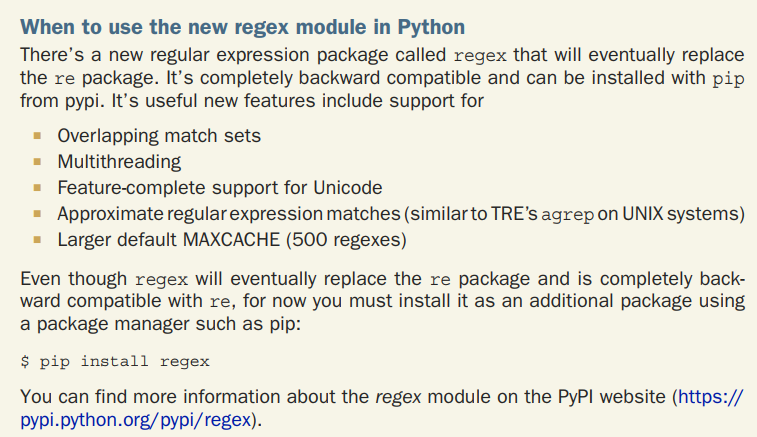

As you can imagine, tokenizers can easily become complex. In one case, you might
want to split based on periods, but only if the period isn’t followed by a number, in order to avoid splitting decimals. In another case, you might not want to split after a period that is part of “smiley” emoticon symbol, such as in a Twitter message.

Several Python libraries implement tokenizers, each with its own advantages and
disadvantages:
* **spaCy**—Accurate , flexible, fast, Python
* **Stanford CoreNLP**—More accurate, less flexible, fast, depends on Java 8
* **NLTK**—Standard used by many NLP contests and comparisons, popular, Python. 

NLTK and Stanford CoreNLP have been around the longest and are the most widely
used for comparison of NLP algorithms in academic papers. 

Even though the Stanford CoreNLP has a Python API, it relies on the Java 8 CoreNLP backend, which must be installed and configured separately. 

So you can use the Natural Language Toolkit (NLTK) tokenizer here to get you up and running quickly; it will help you duplicate the results you see in academic papers and blog posts

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|$[0-9.]+|\S+')
tokenizer.tokenize(sentence)

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26',
 '.']

This tokenizer ignores whitespace tokens. It also separates sentence-ending trailing punctuation from tokens that do not contain any other punctuation characters.

An even better tokenizer is the **[Treebank Word Tokenizer](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.treebank)** from the **NLTK** package. It incorporates a variety of common rules for English word tokenization. For example, it separates phrase-terminating punctuation (?!.;,) from adjacent tokens and retains decimal numbers containing a period as a single token. 

In addition it contains rules for English contractions. For example “don’t” is tokenized as ["do", "n’t"]. This tokenization will help with subsequent steps in the NLP pipeline, such as stemming. 

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
sentence = """Monticello wasn't designated as UNESCO World Heritage Site until 1987."""
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize(sentence)

['Monticello',
 'was',
 "n't",
 'designated',
 'as',
 'UNESCO',
 'World',
 'Heritage',
 'Site',
 'until',
 '1987',
 '.']

## **n-grams**

An **n-gram** is a sequence containing up to n elements that have been extracted from a sequence of those elements, usually a string. 
> *The “elements” of an n-gram can be characters, syllables, words, or even symbols like “A,” “T,” “G,” and “C” used to represent a DNA sequence*

**Why bother with n-grams?**

> *n-grams retain a context of a word when we tie it to its neighbor(s) in the NLP pipeline*

When a sequence of tokens is vectorized into a bag-of-words vector, it loses a lot of the meaning inherent in the order of those words. By extending the concept of a token to include multiword tokens, n-grams, the NLP pipeline can retain much of the meaning inherent in the order of words in the statement. 

For example, the meaning-inverting word “not” will remain attached to its neighboring words, where it belongs. Without n-gram tokenization, it would be free floating. Its meaning would be associated with the entire sentence or document rather than its neighboring words. The 2-gram “was not” retains much more of the meaning of the individual words “not” and “was” than those 1-grams alone in a bag-of-words vector. 

In [ ]:
# tokenize_2grams("Thomas Jefferson began building Monticello at the age of 26.")
sentence = """Thomas Jefferson began building Monticello at the age of 26."""
pattern = re.compile(r"([-\s.,;!?])+")
tokens = pattern.split(sentence)
tokens = [x for x in tokens if x and x not in '- \t\n.,;!?']
tokens

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26']

In [ ]:
from nltk.util import ngrams
list(ngrams(tokens, 2))

[('Thomas', 'Jefferson'),
 ('Jefferson', 'began'),
 ('began', 'building'),
 ('building', 'Monticello'),
 ('Monticello', 'at'),
 ('at', 'the'),
 ('the', 'age'),
 ('age', 'of'),
 ('of', '26')]

In [ ]:
list(ngrams(tokens, 3))

[('Thomas', 'Jefferson', 'began'),
 ('Jefferson', 'began', 'building'),
 ('began', 'building', 'Monticello'),
 ('building', 'Monticello', 'at'),
 ('Monticello', 'at', 'the'),
 ('at', 'the', 'age'),
 ('the', 'age', 'of'),
 ('age', 'of', '26')]

## **Stop Words**

Stop words are common words in any language that occur with a high frequency but carry much less substantive information about the meaning of a phrase.
* a, an
* the, this
* and, or
* of, on

Historically stop words have been excluded from NLP pipelines in order to reduce
the computational effort to extract information from a text. 

Even though the words themselves carry little information, the stop words can provide important relational information as part of an n-gram.

* Mark reported to the CEO
* Suzanne reported as the CEO to the board

In the NLP pipeline, we might create 4-grams such as _`reported to the CEO`_ and *`reported as the CEO`*. 

If you remove the stop words from the 4-grams, both examples would be reduced to _`reported CEO`_

Retaining the stop words within your pipeline creates another problem:
* it increases the length of the n-grams required to make use of these connections formed by the otherwise meaningless stop words. 


If you do decide to arbitrarily filter out a set of stop words during tokenization, a
Python list comprehension is sufficient.

In [ ]:
stop_words = ['a', 'an', 'the', 'on', 'of', 'off', 'this', 'is']
tokens = ['the', 'house', 'is', 'on', 'fire']
tokens_without_stopwords = [x for x in tokens if x not in stop_words]
print(tokens_without_stopwords)

['house', 'fire']


NLTK provides a complete list of “canonical” stop words:

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
len(stop_words)
# stop_words[:7]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

**WARNING** The set of English stop words that sklearn uses is quite different from those in NLTK.

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

len(sklearn_stop_words)

318

## **Normalizing your vocabulary**

Another vocabulary reduction technique is to normalize the vocabulary so that tokens that mean similar things are combined into a single, normalized form. 

Doing so reduces the number of tokens you need to retain in your vocabulary and also improves the association of meaning across those different “spellings” of a token or ngram in the corpus.

**Case Folding**

> Case folding is when you consolidate multiple “spellings” of a word that differ only in their capitalization

Capitalization is often used to indicate that a word is a proper noun, the name of a person, place, or thing.



In [ ]:
tokens = ['House', 'Visitor', 'Center']
normalized_tokens = [x.lower() for x in tokens]
print(normalized_tokens)

['house', 'visitor', 'center']


**Stemming**

Another common vocabulary normalization technique is to eliminate the small meaning differences of pluralization or possessive endings of words, or even various verb forms. 

This normalization, identifying a common stem among various forms of a
word, is called stemming. 
> E.g. the words housing and houses share the same stem, house. 

Stemming removes suffixes from words in an attempt to combine words
with similar meanings together under their common stem. 

A stem isn’t required to be a properly spelled word, but merely a token, or label, representing several possible spellings of a word.

However, stemming could greatly reduce the “precision” score for your search engine, because it might return many more irrelevant documents along with the relevant ones.

In [ ]:
# Here’s a simple stemmer implementation in pure Python that 
# can handle trailing S’s:
import re
def stem(phrase):
  return ' '.join([re.findall('^(.*ss|.*?)(s)?$', word)[0][0].strip("'") for word in phrase.lower().split()])

stem('houses')


'house'

In [ ]:
stem("Doctor House's calls")

'doctor house call'

Two of the most popular stemming algorithms are 
1. Porter stemmers  
2. Snowball stemmers

The Porter stemmer is named for the computer scientist Martin Porter. Porter
is also responsible for enhancing the Porter stemmer to create the Snowball stemmer.Porter dedicated much of his lengthy career to documenting and improving stemmers,
due to their value in information retrieval (keyword search). These stemmers implement more complex rules than our simple regular expression. This enables the stemmer to handle the complexities of English spelling and word ending rules:

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
' '.join([stemmer.stem(w).strip("'") for w in "dish washer's washed dishes".split()])

'dish washer wash dish'

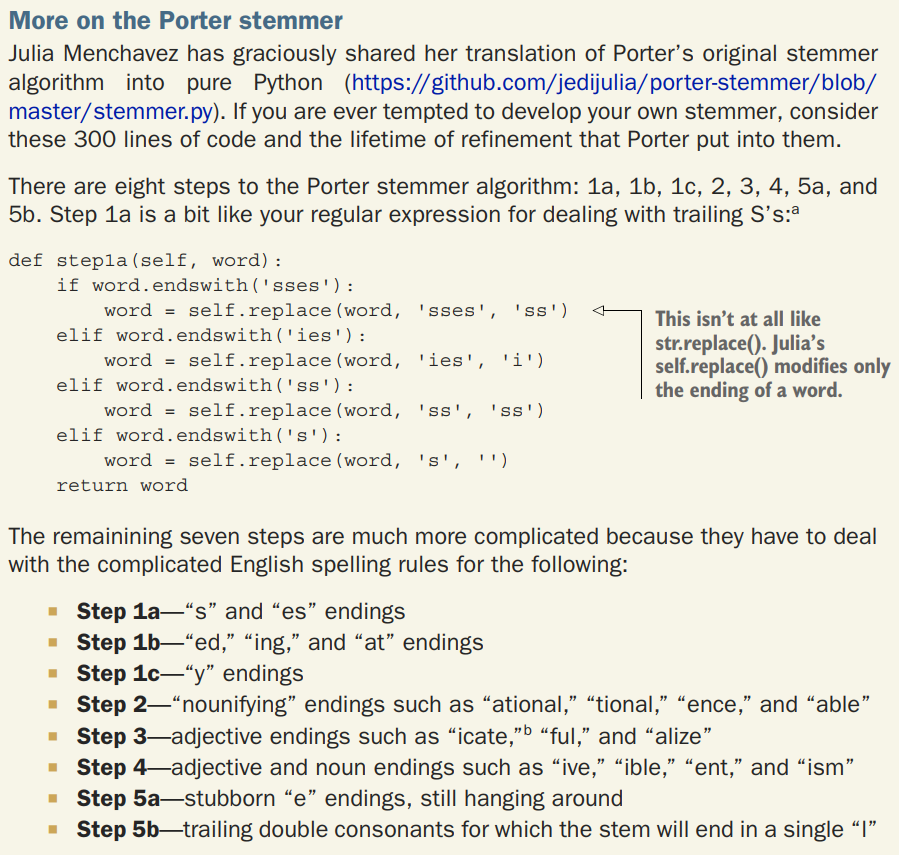

**Lemmatization**

If you have access to information about connections between the meanings of various words, you might be able to associate several words together even if their spelling is quite different. 

This more extensive normalization down to the semantic root of a word—its lemma—is called lemmatization.

Any NLP pipeline that wants to “react” the same for multiple different spellings of the same basic root word can benefit from a lemmatizer. 

NLTK package provides functions for identifying word lemmas. You must tell the WordNetLemmatizer which part of speech your are interested in, if you want to find the most accurate lemma:

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# The default part of speech is “n” for noun.
print(lemmatizer.lemmatize("better"))
# 'better'

# “a” indicates the adjective part of speech.
print(lemmatizer.lemmatize("better", pos="a"))
# 'good'
print(lemmatizer.lemmatize("good", pos="a"))
# 'good'
print(lemmatizer.lemmatize("goods", pos="a"))
# 'goods'
print(lemmatizer.lemmatize("goods", pos="n"))
# 'good'
print(lemmatizer.lemmatize("goodness", pos="n"))
# 'goodness'
print(lemmatizer.lemmatize("best", pos="a"))

better
good
good
goods
good
goodness
best


the NLTK lemmatizer is restricted to the connections within the Princeton WordNet graph of word meanings. So the word “best” doesn’t lemmatize to the same root as “better.” This graph is also missing the connection between “goodness” and “good.” 

A Porter stemmer, on the other hand, would make this connection by blindly stripping off the “ness” ending of all words:

In [ ]:
stemmer.stem('goodness')

'good'

**Use Cases**

When should you use a lemmatizer or a stemmer? Stemmers are generally faster to
compute and require less-complex code and datasets. But stemmers will make more
errors and stem a far greater number of words, reducing the information content or
meaning of your text much more than a lemmatizer would. Both stemmers and lemmatizers will reduce your vocabulary size and increase the ambiguity of the text. But
lemmatizers do a better job retaining as much of the information content as possible
based on how the word was used within the text and its intended meaning. Therefore,
some NLP packages, such as spaCy, don’t provide stemming functions and only offer
lemmatization methods.

# **Measuring Sentiment**

_**Sentiment analysis**_ — measuring the sentiment of phrases or chunks of text—is a common application of NLP. 

In many companies it’s the main thing an NLP  engineer is asked to do. Companies like to know what users think of their products.

**Question**: What kind of pipeline would you create to measure the sentiment of a block of text?

There are two approaches to sentiment analysis:
* A rule-based algorithm composed by a human
* A machine learning model learned from data by a machine

## **VADER—A rule-based sentiment analyzer**

Hutto and Gilbert at GA Tech came up with one of the first successful rule-based sentiment analysis algorithms. They called their algorithm **VADER**, for **V**alence **A**ware **D**ictionary for s**E**ntiment **R**easoning.

The NLTK package has an implementation of the VADER algorithm in
nltk.sentiment.vader. Hutto himself maintains the Python package `vaderSentiment`.

The first approach to sentiment analysis uses human-designed rules, sometimes called heuristics, to measure sentiment. 

A common rule-based approach to sentiment analysis is to find keywords in the text and map each one to numerical scores or weights in a dictionary or “mapping”—a Python dict, for example. 

You can use stems, lemmas, or n-gram tokens in your dictionary, rather
than just words. 

The “rule” in your algorithm would be to add up these scores for each keyword in a document that you can find in your dictionary of sentiment scores. 

Of course you need to hand-compose this dictionary of keywords and their sentiment scores before you can run this algorithm on a body of text. 

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.2 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# SentimentIntensityAnalyzer.lexicon contains that
# dictionary of tokens and their scores that we talked about.
sa = SentimentIntensityAnalyzer()

In [ ]:
# A tokenizer better be good at dealing with
# punctuation and emoticons (emojis) for VADER
# to work well. After all, emoticons are designed
# to convey a lot of sentiment (emotion).
sa.lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

{ ... \\
':(': -1.9, \\
':)': 2.0, \\
... \\
'pls': 0.3, \\
'plz': 0.3, \\
... \\
'great ': 3.1, \\
... } \\

A tokenizer better be good at dealing with
punctuation and emoticons (emojis) for VADER
to work well. After all, emoticons are designed
to convey a lot of sentiment (emotion).

If you use a stemmer (or lemmatizer) in your pipeline, you’ll need to
apply that stemmer to the VADER lexicon, too, combining the scores
for all the words that go together in a single stem or lemma.

In [ ]:
[(tok, score) for tok, score in sa.lexicon.items() if " " in tok]

[("( '}{' )", 1.6),
 ("can't stand", -2.0),
 ('fed up', -1.8),
 ('screwed up', -1.5)]

Out of 7500 tokens defined in VADER, only 4
contain spaces, and only 3 of those are actually
n-grams; the other is an emoticon for “kiss.”

In [ ]:
sa.polarity_scores(text="Python is very readable and it's great for NLP.")

{'compound': 0.6249, 'neg': 0.0, 'neu': 0.661, 'pos': 0.339}

The VADER algorithm considers the intensity of
sentiment polarity in three separate scores (positive,
negative, and neutral) and then combines them
together into a compound positivity sentiment.

In [ ]:
sa.polarity_scores(text="Python is not a bad choice for most applications.")

{'compound': 0.431, 'neg': 0.0, 'neu': 0.737, 'pos': 0.263}

Notice that VADER handles negation pretty well—“great”
has a slightly more positive sentiment than “not bad.”
VADER’s built-in tokenizer ignores any words that aren’t
in its lexicon, and it doesn’t consider n-grams at all.

Let’s see how well this rule-based approach does for the example statements we mentioned earlier:

In [ ]:
corpus = ["Absolutely perfect! Love it! :-) :-) :-)",
          "Horrible! Completely useless. :(",
          "It was OK. Some good and some bad things."]

In [ ]:
for doc in corpus:
  scores = sa.polarity_scores(doc)
  print('{:+}: {}'.format(scores['compound'], doc))

+0.9428: Absolutely perfect! Love it! :-) :-) :-)
-0.8768: Horrible! Completely useless. :(
-0.1531: It was OK. Some good and some bad things.


The only drawback is that VADER doesn’t look at all the words in a document, only about 7,500. 

What if you want all the words to help add to the sentiment score? 

And what if you don’t want to have to code your own understanding of the words in a dictionary of thousands of words or add a bunch of custom words to the dictionary?

That’s what machine learning sentiment analyzers are for.